# Segmentation d'espèces avec analyse de clusters

#### Introduction
Le jeu de données des Iris est un grand classique du machine learning. Il est souvent utilisé pour illustrer des concepts de base de la classification et du clustering. Une page Wikipedia y est dédiée : https://en.wikipedia.org/wiki/Iris_flower_data_set

Le jeu de données se compose de 4 features numériques qui mesurent les dimensions des sépales et des pétales des fleurs d'iris.

---

#### Objectif
Cet exercice vise à explorer le jeu de données de deux manières distinctes :

1.  **Clustering** : Effectuer une analyse de regroupement non supervisée (K-Means) pour segmenter les fleurs et comparer la segmentation obtenue avec la véritable classification des espèces.

2.  **Classification** : Construire un modèle de classification supervisée (régression logistique) pour prédire l'espèce de chaque fleur.  

---

#### Contenu de ce notebook
Ce notebook traite en détail le premier point de l'exercice : l'analyse de clustering.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Données sans les espèces
data_to_cluster = pd.read_csv('../data/iris_without_species.csv')

data_to_cluster.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
data_to_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<Figure size 960x720 with 0 Axes>

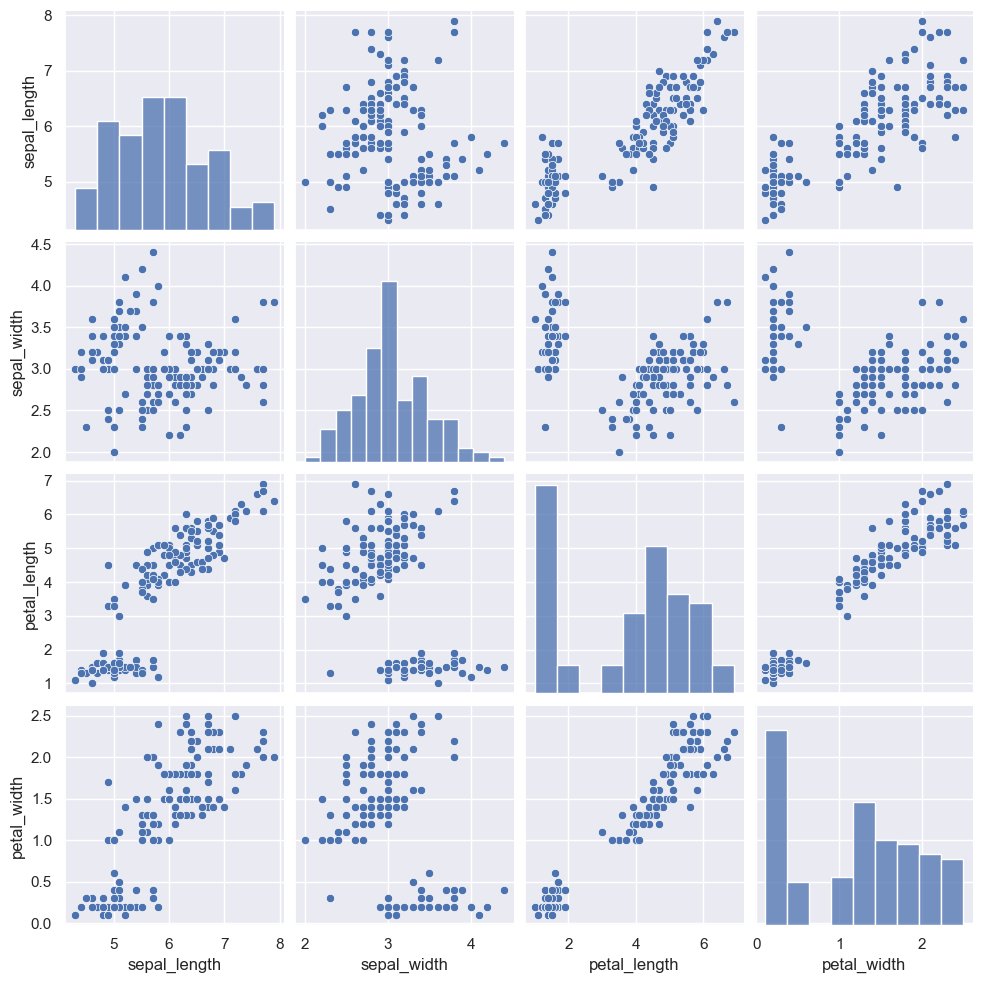

In [4]:
#Visualisation des distributions des points
plt.figure(dpi=150)
sns.pairplot(data_to_cluster)

On peut déjà observer que certaines features séparent nettement les points de données (*e.g.*, le scatterplot petal_width vs petal_length), ce qui laisse entendre qu'il existe **au moins** deux espèces distinctes, et qu'il y en a une nettement discernable de l'autre/des autres.

<Axes: xlabel='petal_length', ylabel='petal_width'>

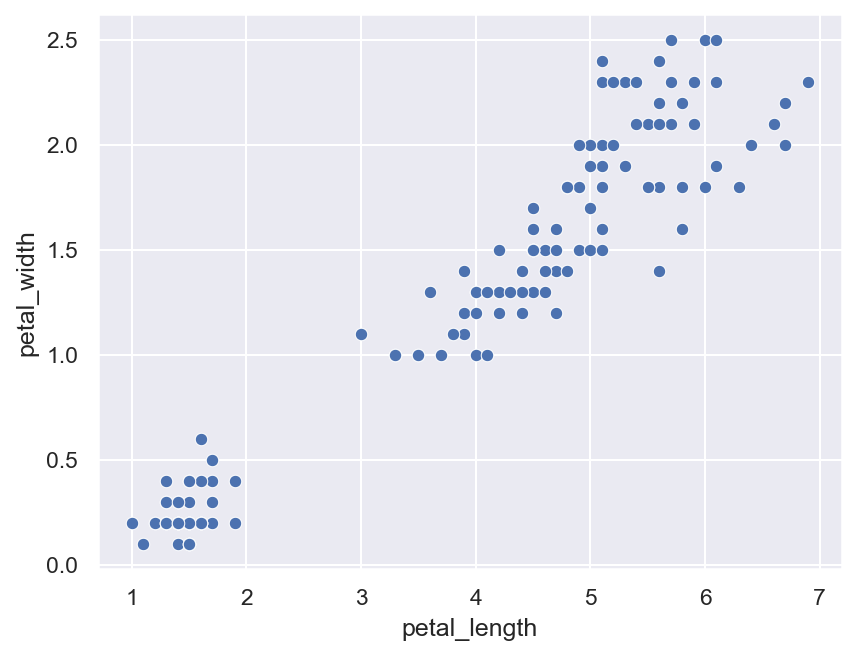

In [5]:
plt.figure(dpi=150)
sns.scatterplot(data_to_cluster, x='petal_length', y='petal_width')

# Mise à l'échelle et Clustering

## Mise à l'échelle

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
#Copie du dataframe pour mise à l'échelle
scaled_data_to_cluster = data_to_cluster.copy()

#Scaler
scaler = StandardScaler()
scaler.fit(scaled_data_to_cluster)

scaled_data_to_cluster = scaler.transform(scaled_data_to_cluster)

## Clustering

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Pour le clustering, on va combiner la méthode du coude et le score de silhouette pour décider du nombre des clusters à garder.

In [9]:
#Suivi de l'inertie intra-cluster avec le "Within-Cluster Sum of Squares"
wcss = []
#Suivi de l'évolution du score de silhouette
sil_score = []
#Nombre max des clusters à considérer
k_max = 11
for i in range (1,k_max):
    kmeans= KMeans(i)
    kmeans.fit(scaled_data_to_cluster)
    wcss_i = kmeans.inertia_
    wcss.append(wcss_i)
    if i>1:
        score_i = silhouette_score(scaled_data_to_cluster, kmeans.labels_)
        sil_score.append(score_i)
    else:
        sil_score.append(np.nan)

print(f"WCSS pour k=1 à {k_max-1}: {wcss}")
print(f"Scores de silhouette pour k=2 à {k_max-1}: {sil_score[1:]}")

WCSS pour k=1 à 10: [600.0, 223.73200573676348, 140.96581663074699, 115.73518623594578, 91.29544474066981, 82.33920749973629, 72.42470426234198, 64.82522319160819, 59.40389869636089, 51.0309801159028]
Scores de silhouette pour k=2 à 10: [0.580184463257396, 0.4589717867018717, 0.41205784435671355, 0.3472646487546106, 0.32282452499996933, 0.35504982257849005, 0.34011995833799974, 0.33354379641795967, 0.3409386275094054]


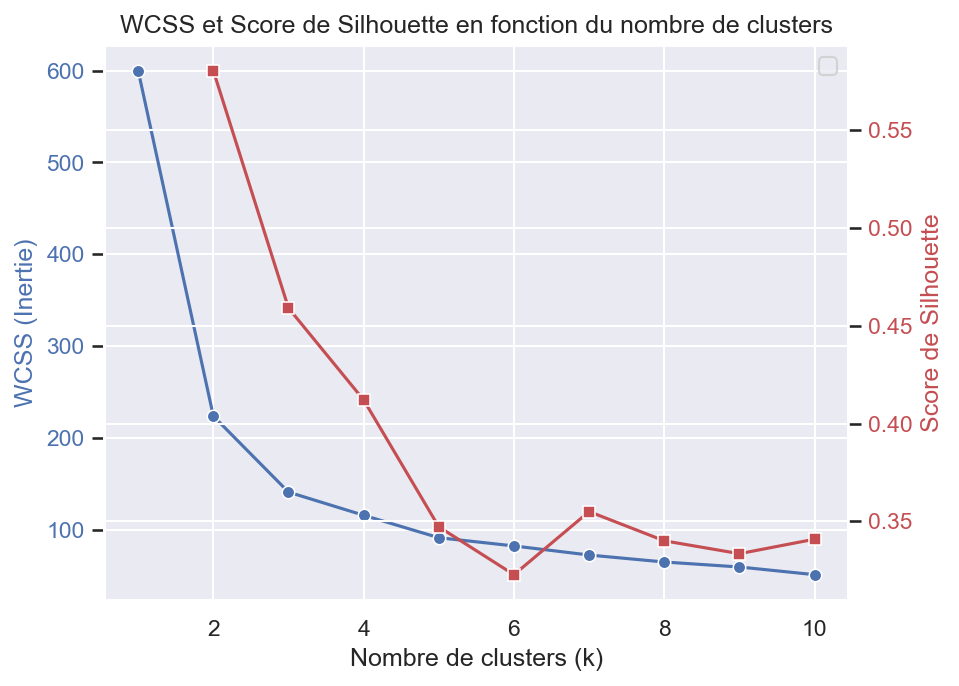

In [10]:
#Évolution de WCSS et du Silhouette score
fig, ax1 = plt.subplots(dpi=150)

#WCSS
sns.lineplot(x=range(1, 11), y=wcss, marker='o', color='b', ax=ax1)
ax1.set_xlabel('Nombre de clusters (k)')
ax1.set_ylabel('WCSS (Inertie)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()

#Évolution du Silhouette score
sns.lineplot(x=range(2, 11), y=sil_score[1:], marker='s', color='r', ax=ax2)
ax2.set_ylabel('Score de Silhouette', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('WCSS et Score de Silhouette en fonction du nombre de clusters')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, ["WCSS", "Score de Silhouette"], loc='best')

plt.show()

**Lecture du graphe** : D'après l'évolution de l'inertie (WCSS), la méthode du coude suggère un nombre de clusters idéal égal à k = 2, k = 3 ou k = 5, tandis que le score de Silhouette est maximal pour k = 2. Cette analyse, sans connaissance préalable du domaine étudié, suggère donc une segmentation idéale basée sur deux groupes : remarque qui a été faite lors de la prise en main du dataframe initial (voir le pairplot plus haut). Sachant qu'il y a plus de deux espèces, le second k idéal est k = 3.

## Pour k = 3

In [11]:
kmeans_3 = KMeans(3)
kmeans_3.fit(scaled_data_to_cluster)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [12]:
trois_clusters = data_to_cluster.copy()
trois_clusters['clusters']=kmeans_3.fit_predict(scaled_data_to_cluster)

In [13]:
trois_clusters

,sepal_length,sepal_width,petal_length,petal_width,clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<Figure size 960x720 with 0 Axes>

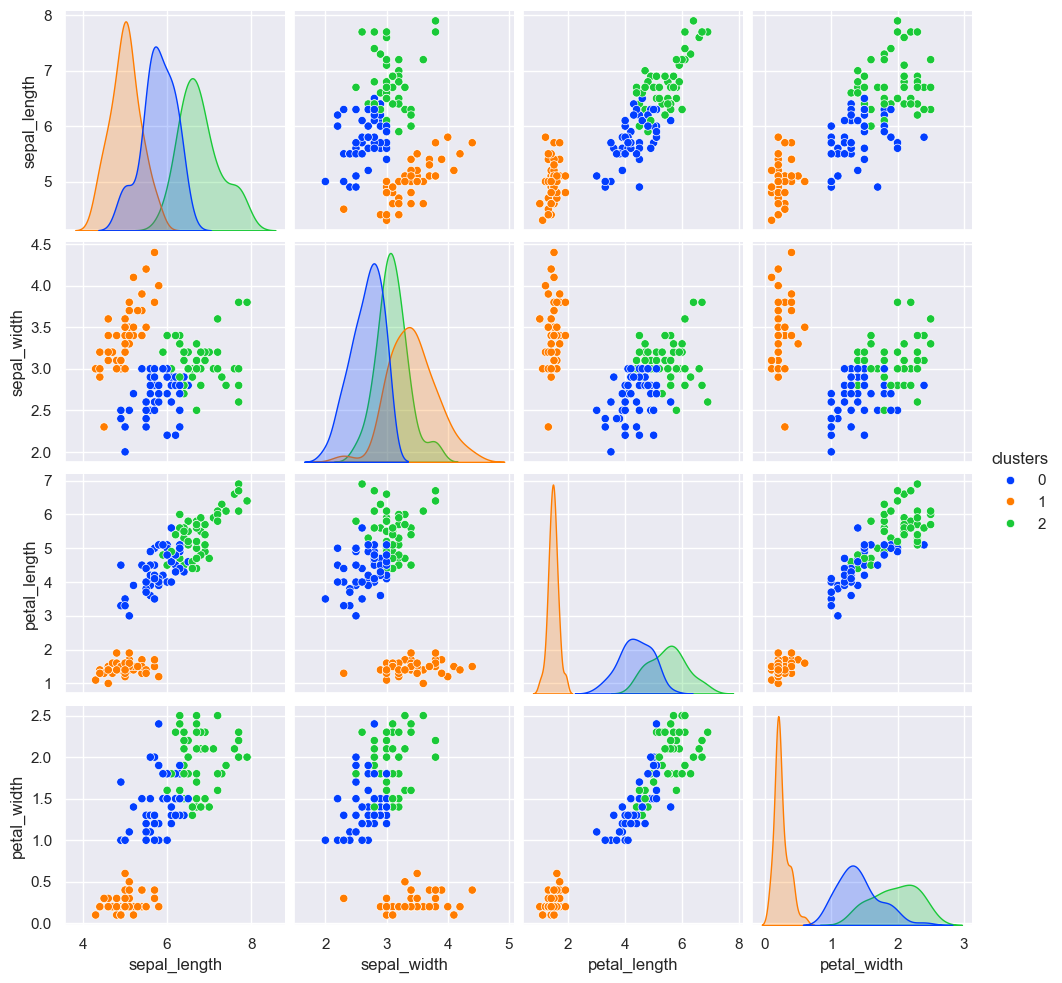

In [14]:
plt.figure(dpi=150)
sns.pairplot(trois_clusters, hue='clusters', palette='bright')

## Comparaison avec la vraie segmentation

In [15]:
data_with_species = pd.read_csv("../data/iris_with_species.csv")

data_with_species.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


<Figure size 960x720 with 0 Axes>

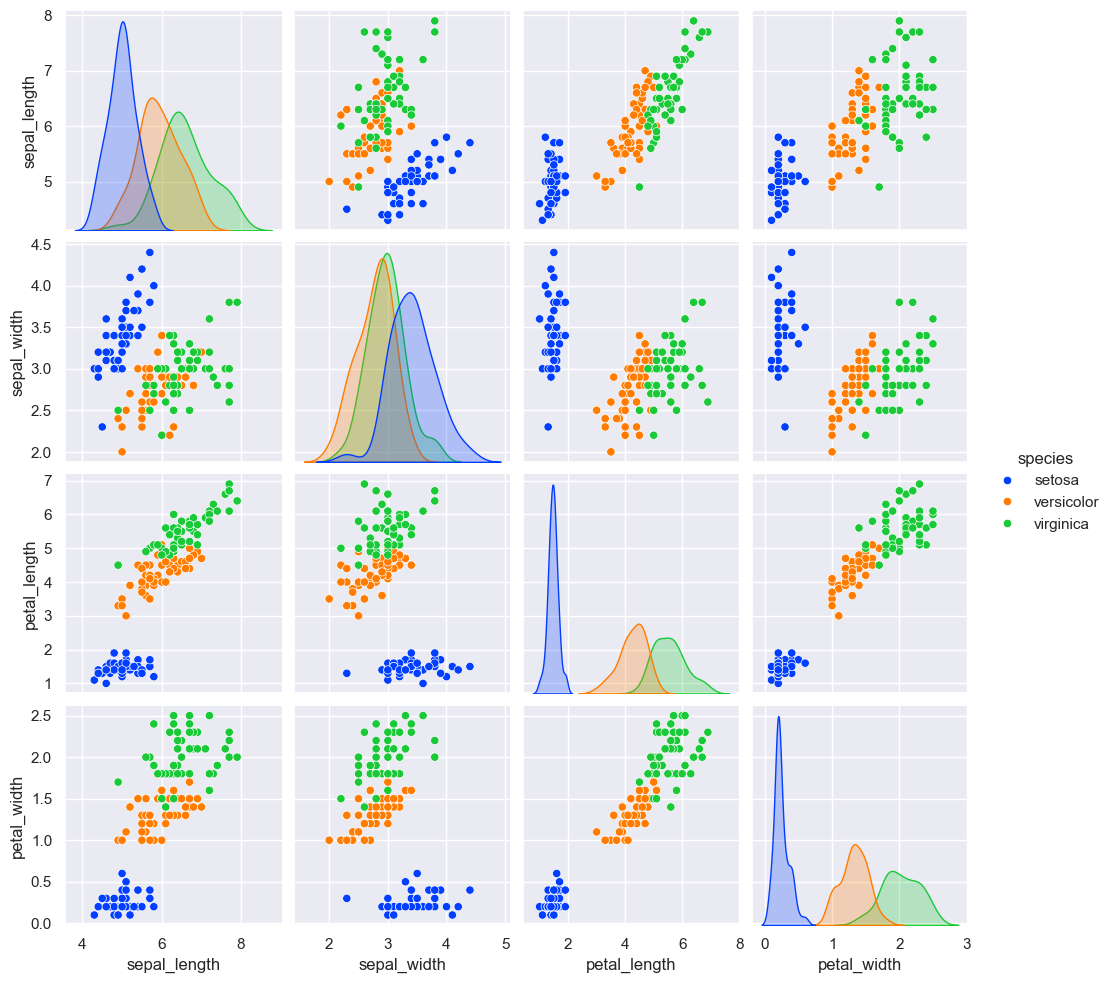

In [16]:
plt.figure(dpi=150)
sns.pairplot(data_with_species, hue='species', palette='bright')

In [17]:
#Pour une bonne comparaison des espèces réelles et des clusters
cluster_mapping = {
    0: 'virginica',
    1: 'setosa',
    2: 'versicolor'
}

trois_clusters['clusters'] = trois_clusters['clusters'].map(cluster_mapping)

### Comparaison de certains graphes

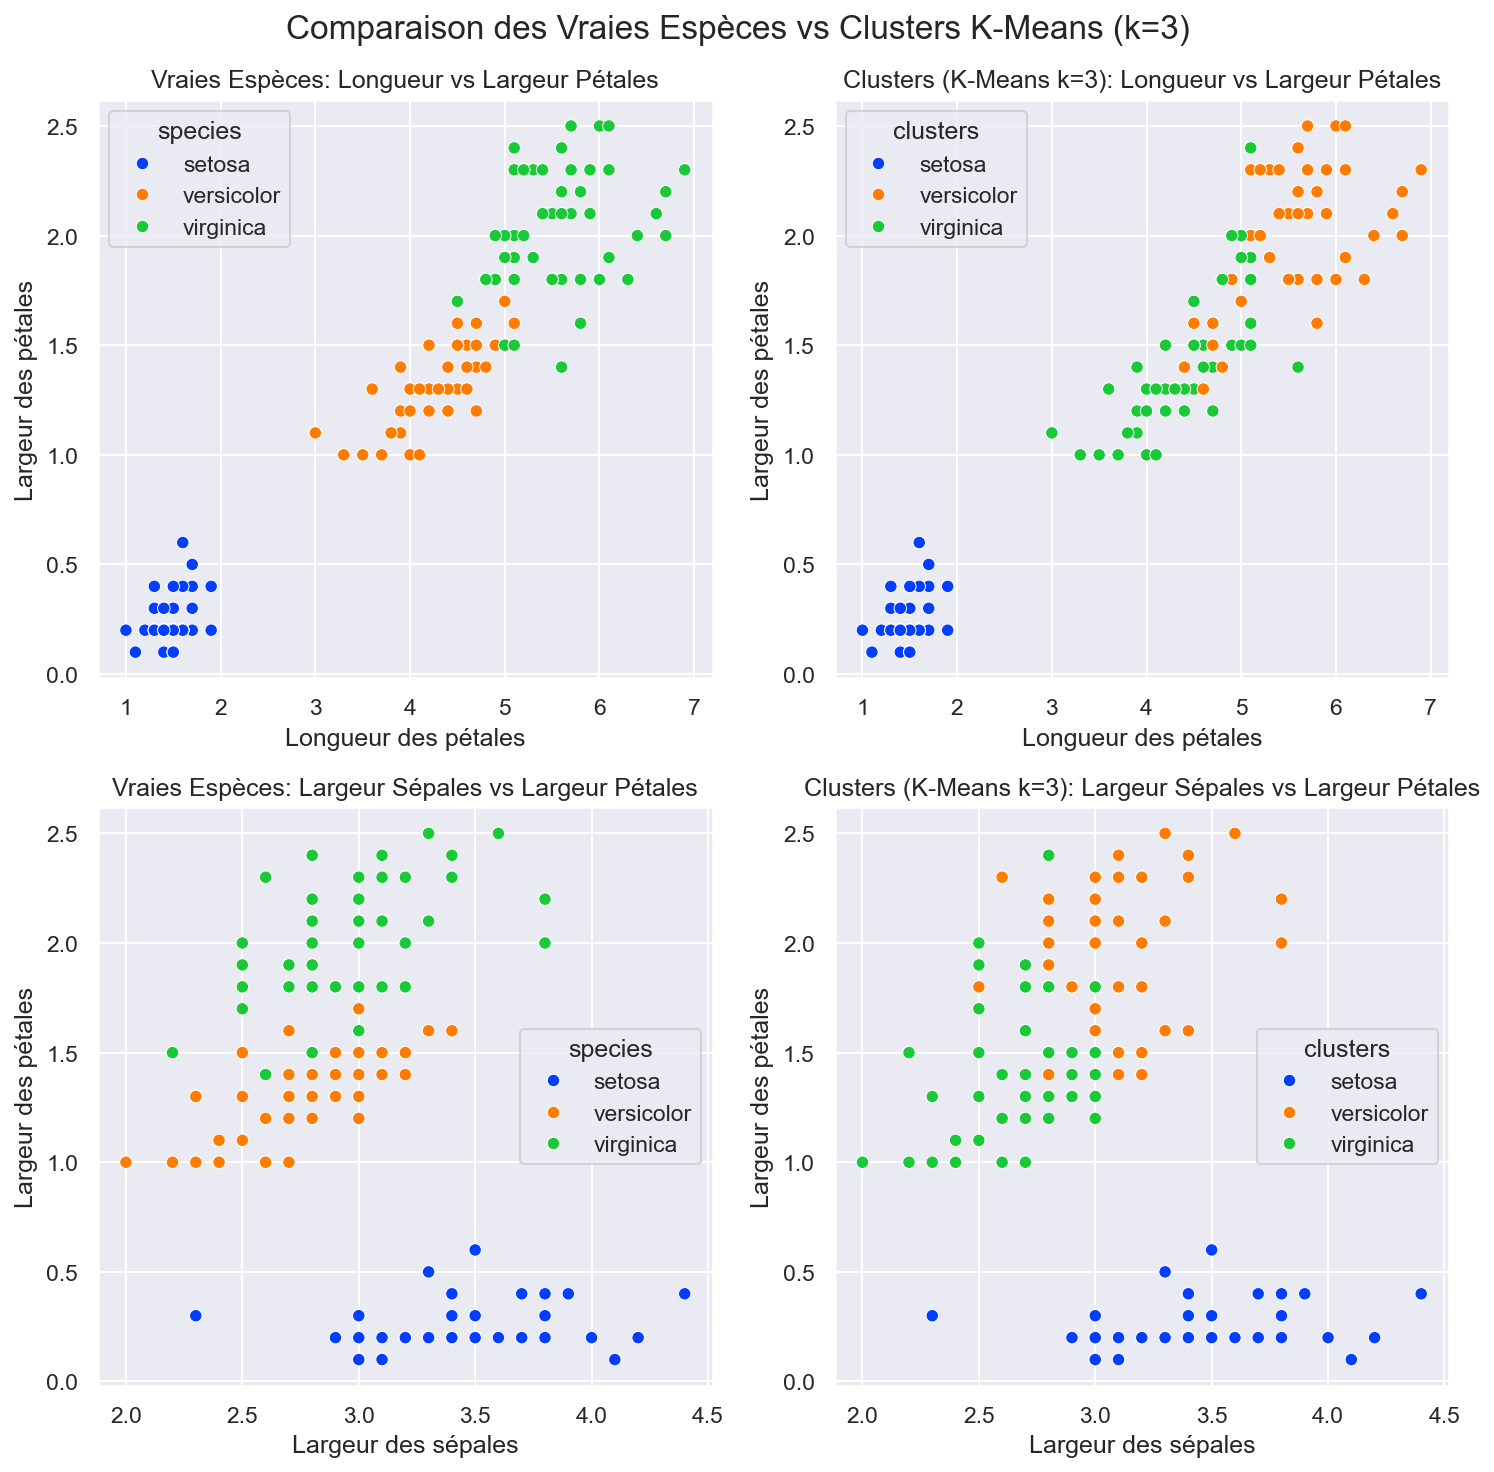

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10,10), dpi=150)
fig.suptitle('Comparaison des Vraies Espèces vs Clusters K-Means (k=3)', fontsize=16)

#En haut à gauche : petal_width vs petal_length (Vraies espèces)
sns.scatterplot(
    data=data_with_species,
    x='petal_length',
    y='petal_width',
    hue='species',
    ax=axes[0, 0],
    palette='bright'
)
axes[0, 0].set_title('Vraies Espèces: Longueur vs Largeur Pétales')
axes[0, 0].set_xlabel('Longueur des pétales')
axes[0, 0].set_ylabel('Largeur des pétales')

#En haut à droite : petal_width vs petal_length (Clusters)
sns.scatterplot(
    data=trois_clusters,
    x='petal_length',
    y='petal_width',
    hue='clusters',
    ax=axes[0, 1],
    palette='bright'
)
axes[0, 1].set_title('Clusters (K-Means k=3): Longueur vs Largeur Pétales')
axes[0, 1].set_xlabel('Longueur des pétales')
axes[0, 1].set_ylabel('Largeur des pétales')

#En bas à gauche : petal_width vs sepal_width (Vraies espèces)
sns.scatterplot(
    data=data_with_species,
    x='sepal_width',
    y='petal_width',
    hue='species',
    ax=axes[1, 0],
    palette='bright'
)
axes[1, 0].set_title('Vraies Espèces: Largeur Sépales vs Largeur Pétales')
axes[1, 0].set_xlabel('Largeur des sépales')
axes[1, 0].set_ylabel('Largeur des pétales')

#En bas à droite : petal_width vs sepal_width (Clusters)
sns.scatterplot(
    data=trois_clusters,
    x='sepal_width',
    y='petal_width',
    hue='clusters',
    ax=axes[1, 1],
    palette='bright'
)
axes[1, 1].set_title('Clusters (K-Means k=3): Largeur Sépales vs Largeur Pétales')
axes[1, 1].set_xlabel('Largeur des sépales')
axes[1, 1].set_ylabel('Largeur des pétales')

plt.tight_layout()
plt.show()